**Требуется найти все неподвижные точки, провести их классификацию и построить фазовый портрет для нескольких значений параметра, описать бифуркации происходящие при изменении параметра.** \\ 
Вариант №12

\begin{equation*}
\begin{cases}
\dot{x} = \frac{x^3}{2} + y \\
\dot{y} = -x + \alpha x^2 y + \frac{y^3}{2}
\end{cases}
\end{equation*}


$$

\begin{cases}
    \dot{x} = 0 \\
    \dot{y} = 0
\end{cases}

\iff

\begin{cases}
\frac{x^3}{2} + y = 0 \\
-x + \alpha x^2 y + \frac{y^3}{2} = 0
\end{cases}

\iff

\begin{cases}
y = -\frac{x^3}{2} \\
-x + \alpha x^2 \left( -\frac{x^3}{2} \right) + \frac{ \left( -\frac{x^3}{2} \right)^3}{2} = 0
\end{cases}

\iff

\begin{cases}
y = -\frac{x^3}{2} \\
-x - \frac{\alpha x^5}{2} - \frac{x^9}{16} = 0
\end{cases}

\iff

\begin{cases}
    y = -\frac{x^3}{2} \\
    \left[
        \begin{gathered}
            x = 0 \\
            x^8 + 8 \alpha x^4 + 16 = 0
        \end{gathered}
    \right.
\end{cases}

$$

$$
z = x^4 \implies z^2 + 8 \alpha z + 16 = 0 \\
\Delta = \left( 8 \alpha \right)^2 - 4 \cdot 1 \cdot 16 = 
64 \alpha^2 - 64 = 64 \left( \alpha^2 - 1 \right), \, \Delta \geq 0 \iff \alpha \in (-\infty; -1] \cup [1; +\infty) \\
z = \frac{-8 \alpha \pm 8 \sqrt{\alpha^2 - 1}}{2} = -4 \alpha \pm 4 \sqrt{\alpha^2 - 1}
$$

$$ x^4 = -4 \alpha \pm 4 \sqrt{\alpha^2 - 1} \iff x = \pm \sqrt[4]{-4 \alpha \pm 4 \sqrt{\alpha^2 - 1}} $$

$$ y = -\frac{x^3}{2} = -\frac{1}{2} \left( \pm \sqrt[4]{-4 \alpha \pm 4 \sqrt{\alpha^2 - 1}} \right)^3 $$

$$

J = 
\begin{pmatrix}
\frac{\partial{P}}{\partial{x}} & \frac{\partial{P}}{\partial{y}} \\
\frac{\partial{Q}}{\partial{x}} & \frac{\partial{Q}}{\partial{y}}
\end{pmatrix} =

\begin{pmatrix}
\frac{3 x^2}{2} & 1 \\
-1 + 2 \alpha x y & \alpha x^2 + \frac{3 y^2}{2}
\end{pmatrix}

$$

$$
\det(J - \lambda I) = 0 \iff
\begin{vmatrix}
\frac{3 x^2}{2} - \lambda & 1 \\
-1 + 2 \alpha x y & \alpha x^2 + \frac{3 y^2}{2} - \lambda
\end{vmatrix} = 0 \iff
\left( \frac{3 x^2}{2} - \lambda \right) \left( \alpha x^2 + \frac{3 y^2}{2} - \lambda \right) - \left(-1 + 2 \alpha x y \right) = 0

$$

In [44]:
import numpy as np
import sympy
from sympy.abc import x, y, alpha
from phaseportrait import PhasePortrait2D
import matplotlib.pyplot as plt

In [45]:
def P(x0, y0):
    return (x0**3 / 2 + y0)


def Q(x0, y0, alpha0=alpha):
    return (-x0 + alpha0 * x0**2 * y0 + y0**3 / 2)

In [46]:
def fixed_points(alpha0 = alpha):
    return sympy.solve([P(x, y), Q(x, y, alpha0)], [x, y], dict=False)

points = fixed_points()
points

[(0, 0),
 (sqrt(2)*(-sqrt(-4*alpha**3 - 4*alpha**2*sqrt(alpha**2 - 1) + 3*alpha + sqrt(alpha**2 - 1)))**(3/2)*(-2*alpha**2 + 2*alpha*sqrt(alpha**2 - 1) + 1),
  sqrt(2)*sqrt(-sqrt(-4*alpha**3 - 4*alpha**2*sqrt(alpha**2 - 1) + 3*alpha + sqrt(alpha**2 - 1)))),
 (sqrt(2)*(-sqrt(-4*alpha**3 - 4*alpha**2*sqrt(alpha**2 - 1) + 3*alpha + sqrt(alpha**2 - 1)))**(3/2)*(2*alpha**2 - 2*alpha*sqrt(alpha**2 - 1) - 1),
  -sqrt(2)*sqrt(-sqrt(-4*alpha**3 - 4*alpha**2*sqrt(alpha**2 - 1) + 3*alpha + sqrt(alpha**2 - 1)))),
 (sqrt(2)*(-sqrt(-4*alpha**3 + 4*alpha**2*sqrt(alpha**2 - 1) + 3*alpha - sqrt(alpha**2 - 1)))**(3/2)*(-2*alpha**2 - 2*alpha*sqrt(alpha**2 - 1) + 1),
  sqrt(2)*sqrt(-sqrt(-4*alpha**3 + 4*alpha**2*sqrt(alpha**2 - 1) + 3*alpha - sqrt(alpha**2 - 1)))),
 (sqrt(2)*(-sqrt(-4*alpha**3 + 4*alpha**2*sqrt(alpha**2 - 1) + 3*alpha - sqrt(alpha**2 - 1)))**(3/2)*(2*alpha**2 + 2*alpha*sqrt(alpha**2 - 1) - 1),
  -sqrt(2)*sqrt(-sqrt(-4*alpha**3 + 4*alpha**2*sqrt(alpha**2 - 1) + 3*alpha - sqrt(alpha**2 - 1)

In [47]:
def field(x0, y0, alpha0=alpha):
    return (P(x0, y0), Q(x0, y0, alpha0))
field(x, y)

(x**3/2 + y, alpha*x**2*y - x + y**3/2)

In [48]:
def jacobian(x0, y0, alpha0=alpha):
    return sympy.Matrix([P(x, y), Q(x, y, alpha)]).jacobian([x, y]).subs(x, x0).subs(y, y0).subs(alpha, alpha0)
jacobian(x, y)

Matrix([
[       3*x**2/2,                     1],
[2*alpha*x*y - 1, alpha*x**2 + 3*y**2/2]])

In [49]:
eigvals = list(jacobian(x, y).eigenvals())

In [50]:
eigvals[0].subs(x, 0).subs(y, 0)

-I

In [51]:
eigvals[1].subs(x, 0).subs(y, 0)

I

In [52]:
for (x0, y0) in fixed_points():
    (x0, y0)

0 0
1.5800644761185785 -1.9723974471262558
-1.5800644761185785 1.9723974471262558
1.2657711316395086 -1.0139944172580233
-1.2657711316395086 1.0139944172580233


c:\Users\egora\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
c:\Users\egora\AppData\Local\Programs\Python\Python311\Lib\site-packages\phaseportrait\streamlines\streamlines_base.py:137: RuntimeWarning: divide by zero encountered in divide
  deltat = np.min(self.get_delta_coordinates(*coords)/(10*np.max(np.abs(_speed))))


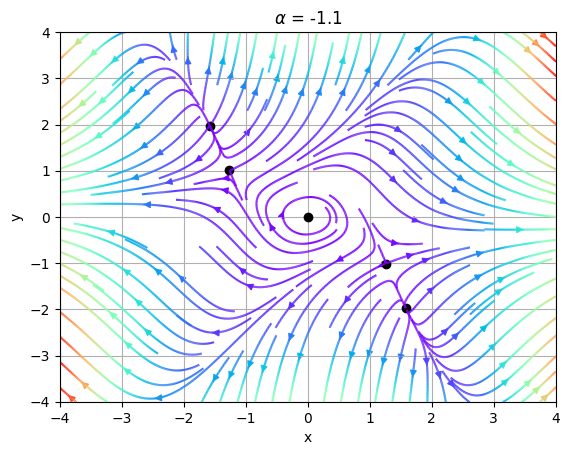

In [60]:
alpha0 = -1.1
portrait = PhasePortrait2D(
    field, [-4, 4], dF_args={'alpha0': alpha0}, Title=r'$ \alpha $ = ' + f'{alpha0}', xlabel='x', ylabel='y')


pts = [(0, 0)]
if (alpha0 == -1):
    pts.append((np.sqrt(2), -np.sqrt(2)))
    pts.append((-np.sqrt(2), np.sqrt(2)))

if (alpha0 < -1):
    pts.append((np.sqrt(2) * (-alpha0 + np.sqrt(alpha0**2 - 1))**(1/4), 
                -np.sqrt(2) * (-alpha0 + np.sqrt(alpha0**2 - 1))**(3/4)))
    pts.append((-np.sqrt(2) * (-alpha0 + np.sqrt(alpha0**2 - 1))**(1/4), 
                np.sqrt(2) * (-alpha0 + np.sqrt(alpha0**2 - 1))**(3/4)))
    pts.append((np.sqrt(2) * (-alpha0 - np.sqrt(alpha0**2 - 1))**(1/4), 
                -np.sqrt(2) * (-alpha0 - np.sqrt(alpha0**2 - 1))**(3/4)))
    pts.append((-np.sqrt(2) * (-alpha0 - np.sqrt(alpha0**2 - 1))**(1/4), 
                np.sqrt(2) * (-alpha0 - np.sqrt(alpha0**2 - 1))**(3/4)))

for (x0, y0) in pts:
    print(x0, y0)
    plt.plot(x0, y0, 'ko')

fig, ax = portrait.plot()
plt.show()